<a href="https://colab.research.google.com/github/wcj365/college-scorecard/blob/master/references/GenderPayGap2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash

curl "https://gender-pay-gap.service.gov.uk/viewing/download-data?year=2017" > /tmp/gender_pay_gap.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4185k  100 4185k    0     0  1524k      0  0:00:02  0:00:02 --:--:-- 1524k


In [2]:
import pandas as pd
df1 = pd.read_csv("/tmp/gender_pay_gap.csv")
df1.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10561.000000,10561.000000,10541.000000,10541.000000,10561.000000,10561.000000,10561.000000,10561.000000,10561.000000,10561.000000,10561.000000,10561.000000,10561.000000,10561.000000
mean,14.337657,11.789376,7.656181,-21.762385,35.383638,33.917470,46.331929,53.668071,50.519657,49.480343,54.859871,45.140129,60.812092,39.187908
std,14.910206,15.833117,833.689156,1400.099688,36.328877,36.013165,24.129532,24.129532,26.092817,26.092817,26.221492,26.221492,24.398999,24.398999
min,-400.000000,-196.500000,-82000.000000,-120695.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.700000,0.000000,0.000000,0.800000,0.300000,27.000000,35.700000,29.500000,27.600000,34.000000,21.500000,41.500000,17.200000
50%,13.300000,9.200000,22.000000,5.000000,19.300000,17.200000,44.300000,55.700000,48.300000,51.700000,54.000000,46.000000,62.700000,37.300000
75%,22.900000,21.000000,53.000000,38.000000,73.200000,70.000000,64.300000,73.000000,72.400000,70.500000,78.500000,66.000000,82.800000,58.500000
max,159.000000,121.200000,3848.200000,3848.200000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [4]:
# http://resources.companieshouse.gov.uk/sic/ 351*0 codes relate to the electricity industry

# SIC Code 35110: Production of electricity
# SIC Code 35120: Transmission of electricity
# SIC Code 35130: Distribution of electricity
# SIC Code 35140: Trade of electricity
    
# retain companies operating in this sector, sort so those with worst mean hourly wage gap appear first

df2 = df1[df1["SicCodes"].str.contains(r"351.0",na=False)].copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1336 to 10243
Data columns (total 25 columns):
EmployerName                 48 non-null object
Address                      48 non-null object
CompanyNumber                48 non-null object
SicCodes                     48 non-null object
DiffMeanHourlyPercent        48 non-null float64
DiffMedianHourlyPercent      48 non-null float64
DiffMeanBonusPercent         48 non-null float64
DiffMedianBonusPercent       48 non-null float64
MaleBonusPercent             48 non-null float64
FemaleBonusPercent           48 non-null float64
MaleLowerQuartile            48 non-null float64
FemaleLowerQuartile          48 non-null float64
MaleLowerMiddleQuartile      48 non-null float64
FemaleLowerMiddleQuartile    48 non-null float64
MaleUpperMiddleQuartile      48 non-null float64
FemaleUpperMiddleQuartile    48 non-null float64
MaleTopQuartile              48 non-null float64
FemaleTopQuartile            48 non-null float64
CompanyLinkTo

In [5]:
df2.sample(10)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
9521,TOTAL GAS & POWER LIMITED,"13th Floor 10 Upper Bank Street,\r\nCanary Wha...",02172239,"35130,\r\n35140,\r\n35220,\r\n35230",37.3,30.2,73.3,47.2,90.6,90.3,52.2,47.8,33.1,66.9,72.1,27.9,76.6,23.4,http://www.total.uk/en/list-of-publication,Laurent Vivier (Senior Vice President Gas),500 to 999,TOTAL GAS & POWER LIMITED,False,05/04/2018 00:00:00,29/03/2018 10:04:11
8286,SOUTHERN ELECTRIC POWER DISTRIBUTION PLC,"No.1 Forbury Place,\r\n43 Forbury Road,\r\nRea...",04094290,35130,14.6,18.7,-5.1,14.4,10.2,6.8,72.9,27.1,78.5,21.5,90.1,9.9,90.4,9.6,http://sse.com/media/504607/SSE-Gender-Pay-Gap...,Alistair Phillips-Davies (Chief Executive),1000 to 4999,SOUTHERN ELECTRIC POWER DISTRIBUTION PLC,False,05/04/2018 00:00:00,18/08/2017 17:41:57
6668,OPUS ENERGY LIMITED,"Drax Power Station,\r\nSelby,\r\nNorth Yorkshi...",04382246,35140,11.9,3.6,11.3,15.3,77.0,81.0,53.0,47.0,53.0,47.0,47.0,53.0,63.0,37.0,http://www.opusenergy.com/about-us/gender-pay-...,"Jonathan Kini (Chief Executive, Drax Retail)",500 to 999,OPUS ENERGY LIMITED,True,05/04/2018 00:00:00,01/05/2018 07:13:10
2895,EDF ENERGY (ENERGY BRANCH) LIMITED,"90 Whitfield Street,\r\nLondon,\r\nEngland,\r\...",02449611,"35110,\r\n70100",10.0,14.0,-24.2,5.8,99.5,100.0,85.8,14.2,96.2,3.8,96.2,3.8,92.5,7.5,https://www.edfenergy.com/sites/default/files/...,Brian Cowell (Managing Director - Generation),250 to 499,EDF ENERGY (ENERGY BRANCH) LIMITED,False,05/04/2018 00:00:00,22/02/2018 11:24:56
3323,FIRST UTILITY LIMITED,"Shell Energy House Westwood Business Park,\r\n...",05070887,35140,20.0,10.0,16.0,33.0,34.0,27.0,60.0,40.0,51.0,49.0,58.0,42.0,73.0,27.0,https://cdn.first-utility.com/wp-content/uploa...,John Wrighthouse (Chief People Officer),1000 to 4999,SHELL ENERGY RETAIL LIMITED,False,05/04/2018 00:00:00,19/02/2018 18:06:21
10241,Western Power Distribution (South Wales) PLC,"Avonbank,\r\nFeeder Road,\r\nBristol,\r\nBS2 0TB",02366985,35130,12.6,10.5,0.0,0.0,1.3,0.0,79.1,20.9,86.5,13.5,92.5,7.5,92.9,7.1,https://www.westernpower.co.uk/GenderPayGapReport,Ian Williams (Resources & External Affairs Dir...,1000 to 4999,WESTERN POWER DISTRIBUTION (SOUTH WALES) PLC,False,05/04/2018 00:00:00,16/03/2018 12:31:52
2896,EDF ENERGY CUSTOMERS LIMITED,"90 Whitfield Street,\r\nLondon,\r\nEngland,\r\...",02228297,"35130,\r\n35220",1.5,-2.2,37.8,21.9,80.5,85.9,95.1,4.9,87.2,12.8,83.5,16.5,93.9,6.1,https://www.edfenergy.com/sites/default/files/...,Dimitri Hovine (HR Director),500 to 999,EDF ENERGY CUSTOMERS LIMITED,False,05/04/2018 00:00:00,22/02/2018 11:25:20
6458,Northern Powergrid (Yorkshire) PLC,"Lloyds Court,\r\n78 Grey Street,\r\nNewcastle ...",04112320,35130,17.8,16.2,36.3,0.9,99.6,98.6,79.0,21.0,88.0,12.0,91.0,9.0,93.0,7.0,http://www.northernpowergrid.com/asset/0/docum...,Phil Jones (President and Chief Executive Offi...,1000 to 4999,NORTHERN POWERGRID (YORKSHIRE) PLC,False,05/04/2018 00:00:00,29/03/2018 12:29:19
8361,SSE GENERATION LIMITED,"No.1 Forbury Place,\r\n43 Forbury Road,\r\nRea...",02310571,35110,25.5,27.0,60.3,27.9,84.3,82.8,79.7,20.3,80.1,19.9,94.2,5.8,95.9,4.1,http://sse.com/media/504607/SSE-Gender-Pay-Gap...,Alistair Phillips-Davies (Chief Executive),500 to 999,SSE GENERATION LIMITED,False,05/04/2018 00:00:00,18/08/2017 17:51:39
4547,INNOGY RENEWABLES UK LIMITED,"Windmill Hill Business Park,\r\nWhitehill Way,...",02550622,35110,22.0,20.0,28.0,17.0,74.0,77.0,63.0,37.0,72.0,28.0,82.0,18.0,87.0,13.0,https://www.innogy.com/web/cms/mediablob/en/38...,Paul Cowling (Managing Director),Not Provided,INNOGY RENEWABLES UK LIMITED,False,05/04/2018 00:00:

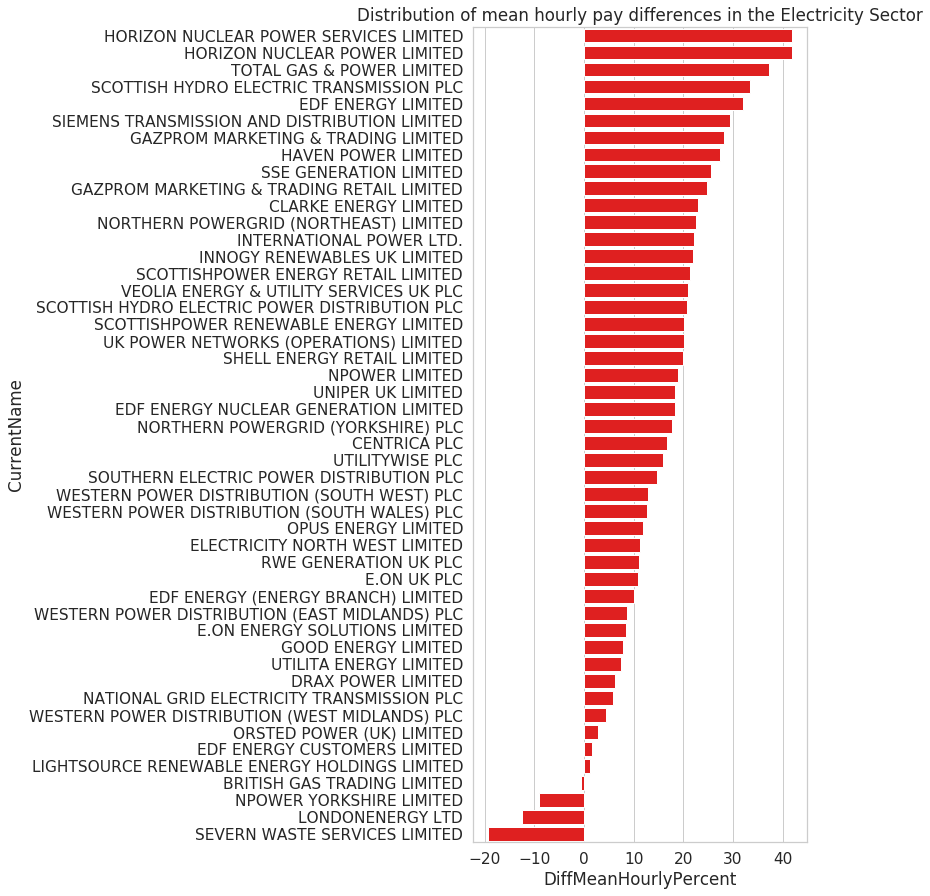

In [6]:
# Lets visualize as a bar plot

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set(style="whitegrid",font_scale=1.4)
plt.subplots(figsize=(6, 15))
ax = sns.barplot(x="DiffMeanHourlyPercent", y="CurrentName", data=df2.sort_values("DiffMeanHourlyPercent", ascending=False),
            label="Mean Difference in Hourly Pay", color="red")
ax.set_title("Distribution of mean hourly pay differences in the Electricity Sector")
plt.show()

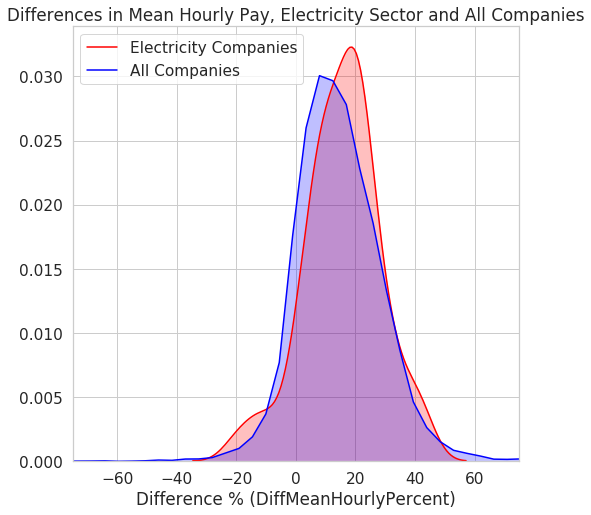

In [7]:
plt.subplots(figsize=(8, 8))
sns.kdeplot(df2["DiffMeanHourlyPercent"],shade=True,color="red",label="Electricity Companies")
ax = sns.kdeplot(df1["DiffMeanHourlyPercent"],shade=True,color="blue",label="All Companies")
plt.xlim([-75,75])
ax.set_title("Differences in Mean Hourly Pay, Electricity Sector and All Companies")
ax.set_xlabel("Difference % (DiffMeanHourlyPercent)")
plt.legend()
plt.show()

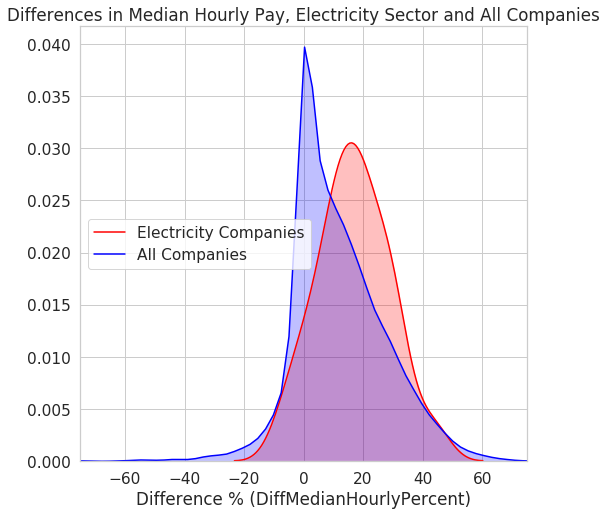

In [8]:
plt.subplots(figsize=(8, 8))
sns.kdeplot(df2["DiffMedianHourlyPercent"],shade=True,color="red",label="Electricity Companies")
ax = sns.kdeplot(df1["DiffMedianHourlyPercent"],shade=True,color="blue",label="All Companies")
ax.set_title("Differences in Median Hourly Pay, Electricity Sector and All Companies")
ax.set_xlabel("Difference % (DiffMedianHourlyPercent)")
plt.xlim([-75,75])
plt.legend()
plt.show()

In [0]:
sns.set(font_scale=1.4)

In [0]:
# compare percentages of male and female employees awarded bonuses
print("Plot of % males awarded bonuses vs % females awarded bonuses in the Electricity Sector")
g = sns.jointplot(size=10, x="MaleBonusPercent", y="FemaleBonusPercent",data=df2, color="red", kind="reg",xlim=(0,100), ylim=(0,100))

In [0]:
plt.subplots(figsize=(8, 8))
sns.kdeplot(df2["DiffMeanBonusPercent"],shade=True,color="green",label="DiffMeanBonusPercent")
ax = sns.kdeplot(df2["DiffMedianBonusPercent"],shade=True,color="orange",label="DiffMedianBonusPercent")
ax.set(xlabel="Difference % (Mean and Median Bonus Pay)",title="Distribution of Bonus Pay Differences in the Electricty Sector")
plt.legend()

In [0]:
# fit a regression model on the percentage of female employees across pay quartiles

from sklearn import linear_model

df2["S"] = df2[["FemaleLowerQuartile","FemaleLowerMiddleQuartile","FemaleUpperMiddleQuartile","FemaleTopQuartile"]].values.tolist()
df2["Inequality"] = abs(df2.S.apply(lambda x: linear_model.LinearRegression().fit([[1],[2],[3],[4]],x).coef_[0]))
df2["Rank"] = df2["Inequality"].rank(ascending=False)

# companies with a larger AbsGradient have greater inequality across pay quartiles, first the most unequal 6
df3 = df2[df2.Rank.apply(lambda x: x <= 6 or x > max(df2.Rank)-6)].copy()

In [0]:
# transpose the data so we can easily plot.  there is probably a better way to do the transpose!

df3_cols = df3[["Rank","CurrentName"]]

df4 = df3_cols.assign(**{"%Female":df3["FemaleTopQuartile"],"Quartile":4}).append(
    [df3_cols.assign(**{"%Female":df3["FemaleLowerQuartile"],"Quartile":1}),
    df3_cols.assign(**{"%Female":df3["FemaleLowerMiddleQuartile"],"Quartile":2}),
    df3_cols.assign(**{"%Female":df3["FemaleUpperMiddleQuartile"],"Quartile":3})])

In [0]:
print("Energy Companies with most unequal pay distribution across mean hourly pay quartiles")
g = sns.FacetGrid(df4[df4.Rank<=6], col="CurrentName", hue="CurrentName", col_wrap=3, size=8)
g = g.map(sns.barplot,"Quartile","%Female",order=[1,2,3,4])

In [0]:
print("Energy Companies with most equal pay distribution across mean hourly pay quartiles")
g = sns.FacetGrid(df4[df4.Rank>6], col="CurrentName", hue="CurrentName", col_wrap=3, size=8)
g = g.map(sns.barplot,"Quartile","%Female",order=[1,2,3,4])